# Survival analysis of token signatures

## Read bed files containing tokens

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,0,6,TTTTCTT,0.000064,ALF22G140
1,1,7,9,ACC,-0.000395,ALF22G140
2,1,10,13,GACA,0.001573,ALF22G140
3,1,14,18,AGAAT,-0.000986,ALF22G140
4,1,19,25,TAATTAT,0.000795,ALF22G140
...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044
176721939,5,181674,181676,GCA,-0.003468,AH21C044
176721940,5,181677,181680,TCCA,-0.000228,AH21C044


## Calculate token lengths

In [2]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,0,6,TTTTCTT,0.000064,ALF22G140,7
1,1,7,9,ACC,-0.000395,ALF22G140,3
2,1,10,13,GACA,0.001573,ALF22G140,4
3,1,14,18,AGAAT,-0.000986,ALF22G140,5
4,1,19,25,TAATTAT,0.000795,ALF22G140,7
...,...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044,3
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044,6
176721939,5,181674,181676,GCA,-0.003468,AH21C044,3
176721940,5,181677,181680,TCCA,-0.000228,AH21C044,4


## Calculate counts of token lengths

In [3]:
tokenlengthCountDf = bedDf.token_length.value_counts().reset_index().sort_values(by=['token_length'], ascending=True)
tokenlengthCountDf

,token_length,count
8,1,369058
6,2,3503389
4,3,10246519
3,4,18476852
0,5,54107814
1,6,49067795
2,7,31028269
5,8,8209701
7,9,1528839
9,10,167582


## Plot counts of token lengths

<Axes: xlabel='token_length', ylabel='count'>

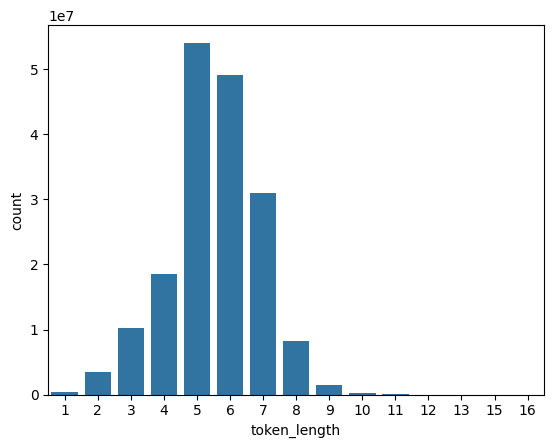

In [4]:
import seaborn as sns

sns.barplot(tokenlengthCountDf, x='token_length', y='count')

## Remove smaller tokens from this analysis

In [5]:
tokensDf = bedDf[bedDf.token_length > 10]
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
12590,1,69263,69273,TATATATATAT,0.000834,ALF22G140,11
61062,1,334856,334866,CTCACTGCAAC,0.002666,ALF22G140,11
66837,1,366582,366592,AAATAAATAAA,-0.002220,ALF22G140,11
75592,2,21195,21205,AAATAAATAAA,-0.001987,ALF22G140,11
83222,2,63338,63350,TTTTTGTATTTTT,0.000883,ALF22G140,13
...,...,...,...,...,...,...,...
176686286,4,266803,266813,AAATAAATAAA,-0.001279,AH21C044,11
176686870,4,270015,270025,TTCTTTTCTTT,-0.001087,AH21C044,11
176703957,5,81915,81925,AAATAAATAAA,0.002236,AH21C044,11
176712559,5,129547,129557,AAAGAAAGAAA,0.000311,AH21C044,11


## Plot attribution score distribution

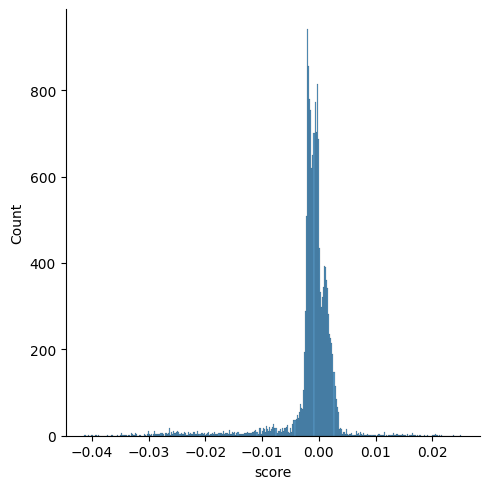

In [6]:
import seaborn as sns


sns.displot(tokensDf.score)

## Plot attribution score distribution (Zoomed)

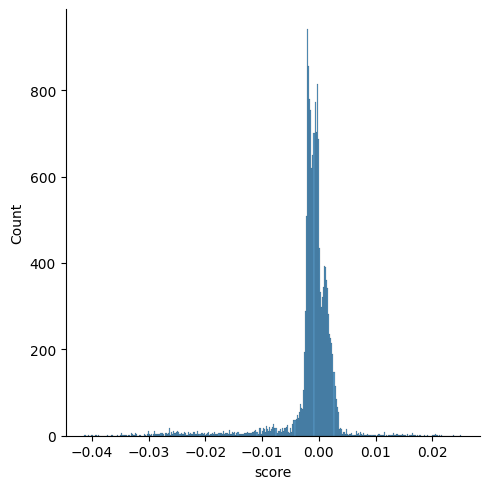

In [8]:
import seaborn as sns


sns.displot(tokensDf[(tokensDf.score > -0.05) & (tokensDf.score < 0.05)].score)

## Calculate high-score cut-off such that ~10 top tokens are selected

In [25]:
highscoreCutoff = tokensDf.score.mean() + 0.9 * tokensDf.score.std()
highscoreCutoff

np.float64(0.0031044564460859115)

## Obtain the number of tokens whose attribution score is over the cut-off

In [26]:
highscoreTokens = tokensDf[(tokensDf.score > highscoreCutoff)].tokens.unique()
len(highscoreTokens)

10

## Display the top tokens whose attribution score is over the cut-off

In [27]:
highscoreTokens

array(['AAATAAATAAA', 'TTTTTGTATTTTT', 'TATATATATAT', 'GGATATTTGGA',
       'TAATTTTTTGTATTTT', 'AAAAATACAAAAA', 'GGGATTATAGG', 'CTCACTGCAAC',
       'ATATATATATATATAT', 'GCTGCAGTGAG'], dtype=object)

## Obtain the number of tubeids containing atlease one if these tokens

In [28]:
len(tokensDf[tokensDf.tokens.isin(highscoreTokens)].tube_id.unique())

557

## Obtain how many of the top tokens each tubeid contains

In [29]:
groupedDf = tokensDf[tokensDf.tokens.isin(highscoreTokens)].groupby(by=['tube_id'])['tokens'].nunique().reset_index().rename(columns={'tokens': 'unique_token_count'})
groupedDf

,tube_id,unique_token_count
0,AH18J001,4
1,AH18J002,4
2,AH18J014,4
3,AH18J021,8
4,AH18J022,7
...,...,...
552,ALF23C134,6
553,ALF23C140,7
554,ALF23C174,5
555,ALF23C182,3


## Obtain the unique token counts distribution

In [30]:
groupedDf.unique_token_count.value_counts()

unique_token_count
5    160
4    149
6    135
3     69
7     25
2     12
8      7
Name: count, dtype: int64

## Create low and high score dataframes

In [31]:
lowscoredf = groupedDf[groupedDf.unique_token_count < 6]
highscoredf = groupedDf[groupedDf.unique_token_count == 6]
lowscoredf.shape, highscoredf.shape

((390, 2), (135, 2))

In [32]:
lowscoredf

,tube_id,unique_token_count
0,AH18J001,4
1,AH18J002,4
2,AH18J014,4
5,AH18J030,3
7,AH18J037,4
...,...,...
550,ALF23C124,5
551,ALF23C128,5
554,ALF23C174,5
555,ALF23C182,3


In [33]:
highscoredf

,tube_id,unique_token_count
6,AH18J036,6
9,AH18J051,6
13,AH18J065,6
19,AH18K010,6
22,AH18K024,6
...,...,...
543,ALF23B065,6
544,ALF23B100,6
547,ALF23C044,6
549,ALF23C094,6


## Save lowscore tubeids

In [34]:
import os

from pathlib import Path


lowscoredf.tube_id.to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'SAUR', 'lowscore_tubeids.txt'), index=False)

## Save highscore tubeids

In [35]:
import os

from pathlib import Path


highscoredf.tube_id.to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'SAUR', 'highscore_tubeids.txt'), index=False)